<a href="https://colab.research.google.com/github/SamuelOliveira/Colab/blob/main/FT084_2021S1_T3_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://quantdev.ssri.psu.edu/sites/qdev/files/09_EnsembleMethods_2017_1127.html

In [ ]:
install.packages('pacman')
pacman::p_load(psych,ggplot2,caret)

In [ ]:
pacman::p_load(rpart,rpart.plot,RColorBrewer,party,partykit,pROC,ISLR)

In [ ]:
pacman::p_load(tree,e1071,randomForest)

# 1. Introdução aos dados

# Prelim - Descriptives
Lets have a quick look at the data file and the descriptives.

In [ ]:
#data structure
head(Carseats,10)

Nosso resultado de interesse será uma versão binária de Sales: Vendas de unidades (em milhares) em cada local.

(Observe novamente que não há nenhuma idvariável. Isso é conveniente para algumas tarefas.)

Descritivos

In [3]:
#sample descriptives
describe(Carseats)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sales,1,400,7.496325,2.8241150,7.49,7.429406,2.868831,0,16.27,16.27,0.18417098,-0.10934021,0.14120575
CompPrice,2,400,124.975000,15.3345115,125.00,125.040625,14.826000,77,175.00,98.00,-0.04243445,0.01107279,0.76672558
Income,3,400,68.657500,27.9860365,69.00,68.259375,35.582400,21,120.00,99.00,0.04907427,-1.09628725,1.39930183
Advertising,4,400,6.635000,6.6503642,5.00,5.890625,7.413000,0,29.00,29.00,0.63479687,-0.56550852,0.33251821
Population,5,400,264.840000,147.3764362,272.00,265.562500,191.255400,10,509.00,499.00,-0.05084308,-1.21128171,7.36882181
Price,6,400,115.795000,23.6766644,117.00,115.921875,22.239000,24,191.00,167.00,-0.12434811,0.41415856,1.18383322
ShelveLoc*,7,400,2.307500,0.8334749,3.00,2.384375,0.000000,1,3.00,2.00,-0.62317348,-1.28167551,0.04167375
Age,8,400,53.322500,16.2002968,54.50,53.484375,20.015100,25,80.00,55.00,-0.07660383,-1.14453644,0.81001484
Education,9,400,13.900000,2.6205282,14.00,13.875000,2.965200,10,18.00,8.00,0.04367733,-1.30562560,0.13102641


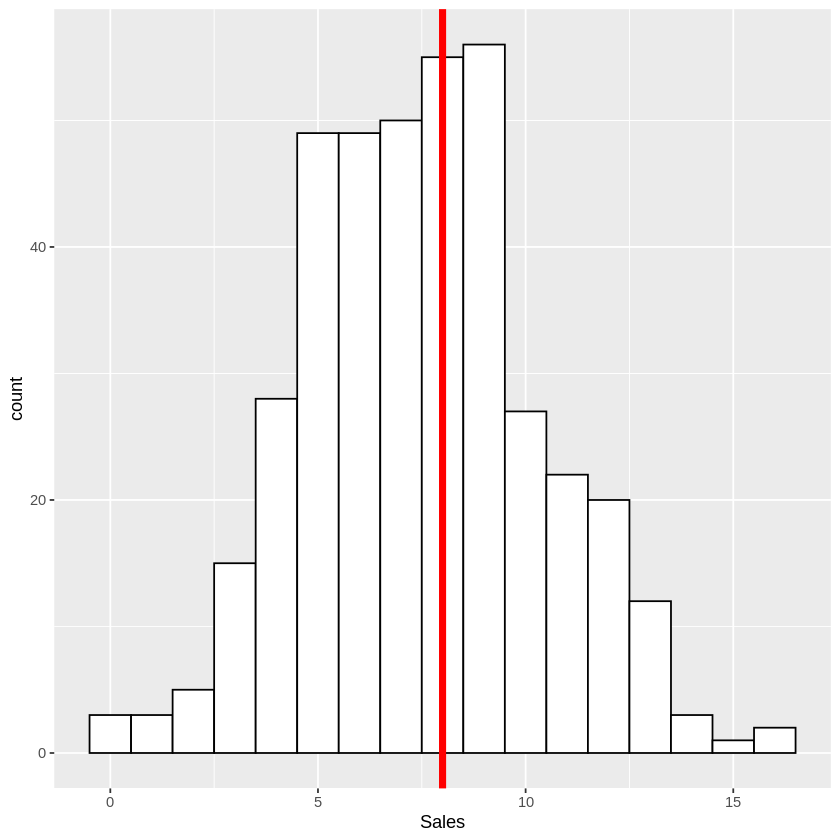

In [4]:
#histogram of outcome
ggplot(data=Carseats, aes(x=Sales)) +
  geom_histogram(binwidth=1, boundary=.5, fill="white", color="black") + 
  geom_vline(xintercept = 8, color="red", size=2) +
  labs(x = "Sales")

Por conveniência da ilustração didática, criamos uma nova variável HighSalesbinária, “Não” se Vendas <= 8 e “Sim” caso contrário.

In [5]:
#creating new binary variable
Carseats$HighSales=ifelse(Carseats$Sales<=8,"No","Yes")

Alguma limpeza de dados

In [6]:
#remove old variable
Carseats$Sales <- NULL
#convert a factor variable into a numeric variable 
Carseats$ShelveLoc <- as.numeric(Carseats$ShelveLoc)

# 2. Dividir os dados em conjuntos de treinamento e teste

In [7]:
#random sample half the rows 
halfsample = sample(dim(Carseats)[1], dim(Carseats)[1]/2) # half of sample
#create training and test data sets
Carseats.train = Carseats[halfsample, ]
Carseats.test = Carseats[-halfsample, ]

Vamos usá-los para avaliar uma variedade de algoritmos de classificação diferentes: Florestas Aleatórias, Florestas,

### Configurando a validação cruzada k-fold k = 10 dobras de validação cruzada.

Primeiro, configuramos o controle de validação cruzada

In [10]:
#Setting the random seed for replication
set.seed(1234)

#setting up cross-validation
cvcontrol <- trainControl(method="repeatedcv", number = 10,
                          allowParallel=TRUE)

# 3. Modelo 0: Uma única árvore de classificação

Primeiramente, otimizamos o ajuste de uma árvore de classificação. Nosso objetivo com a validação cruzada é otimizar o tamanho da árvore - ajustando o parâmetro de complexidade.

In [27]:
train.tree <-train(as.factor(HighSales)~., 
                   data=Carseats.train,
                   method="ctree",
                   trControl=cvcontrol,
                   tuneLength = 10)
train.tree

Conditional Inference Tree 

200 samples
 10 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 179, 180, 179, 181, 181, 180, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa    
  0.0100000     0.6839975  0.3506205
  0.1188889     0.6839975  0.3506205
  0.2277778     0.6892607  0.3608543
  0.3366667     0.6839975  0.3490964
  0.4455556     0.6739975  0.3297512
  0.5544444     0.6597118  0.3037760
  0.6633333     0.6599749  0.3056579
  0.7722222     0.6699749  0.3241938
  0.8811111     0.5796115  0.1638445
  0.9900000     0.5804010  0.1717404

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.2277778.

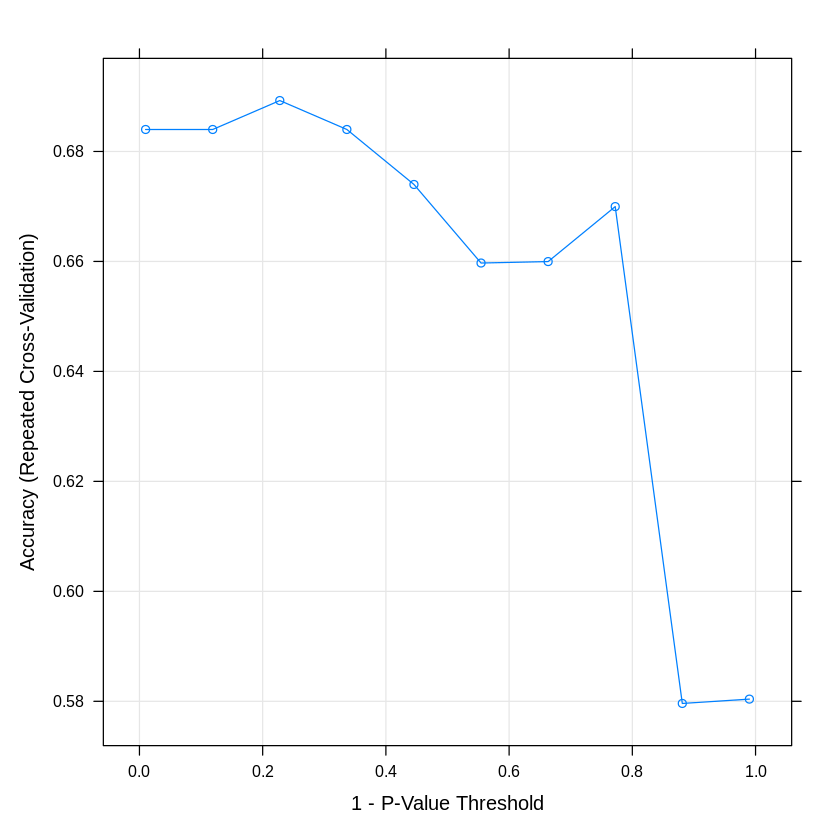

In [28]:
plot(train.tree)

Vemos como a acumulação é maximizada em uma árvore relativamente menos complexa.

Olhe para a árvore final

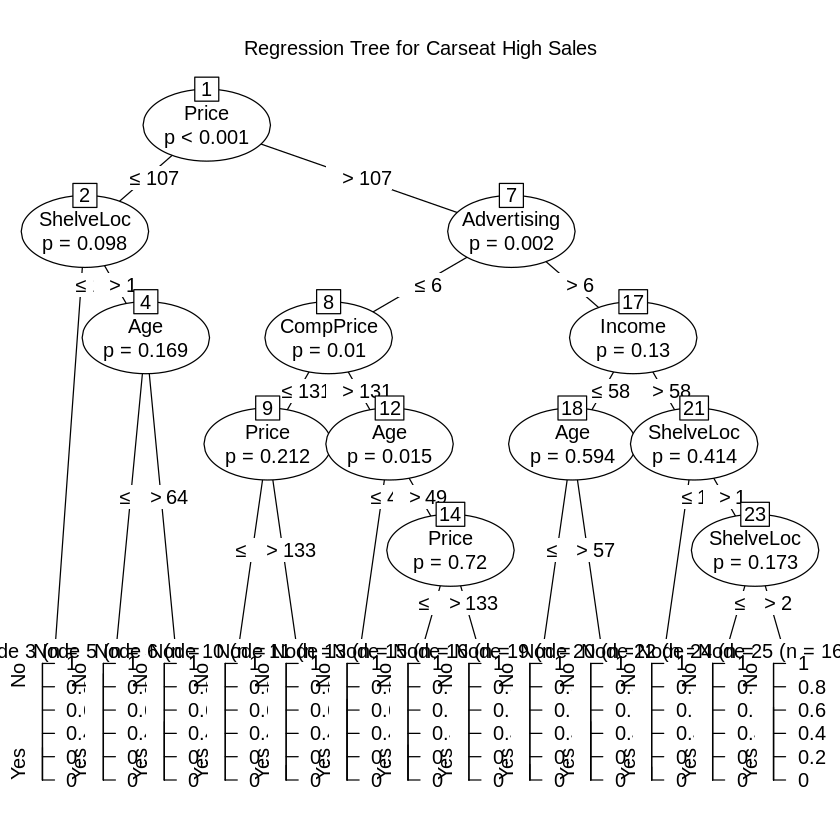

In [30]:
# plot tree
plot(train.tree$finalModel,
    main="Regression Tree for Carseat High Sales")

Para avaliar a precisão da árvore, podemos olhar a matriz de confusão para os dados de treinamento.

In [34]:
#obtaining class predictions
tree.classTrain <-  predict(train.tree, 
                          type="raw")
head(tree.classTrain)
# tree.classTrain

[1] Yes No  Yes Yes Yes No 
Levels: No Yes

In [38]:
# convertendo chr para Factor
Carseats.train$HighSales <- as.factor(Carseats.train$HighSales)
str(Carseats.train)

'data.frame':	200 obs. of  11 variables:
 $ CompPrice  : num  118 128 122 157 116 122 147 131 122 131 ...
 $ Income     : num  90 42 69 93 106 102 58 21 88 111 ...
 $ Advertising: num  10 0 7 0 8 19 7 8 7 13 ...
 $ Population : num  54 436 303 51 244 469 100 220 36 33 ...
 $ Price      : num  104 118 105 149 86 123 191 171 159 80 ...
 $ ShelveLoc  : num  2 3 2 2 3 1 1 2 1 1 ...
 $ Age        : num  31 80 45 32 58 29 27 29 28 68 ...
 $ Education  : num  11 11 16 17 12 13 15 14 17 18 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 1 2 1 2 2 2 2 2 2 2 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 2 2 2 2 ...
 $ HighSales  : Factor w/ 2 levels "No","Yes": 2 1 2 2 2 2 1 1 1 2 ...


In [39]:
#computing confusion matrix
confusionMatrix(Carseats.train$HighSales,tree.classTrain)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  101  13
       Yes  24  62
                                          
               Accuracy : 0.815           
                 95% CI : (0.7541, 0.8663)
    No Information Rate : 0.625           
    P-Value [Acc > NIR] : 4.205e-09       
                                          
                  Kappa : 0.6166          
                                          
 Mcnemar's Test P-Value : 0.1002          
                                          
            Sensitivity : 0.8080          
            Specificity : 0.8267          
         Pos Pred Value : 0.8860          
         Neg Pred Value : 0.7209          
             Prevalence : 0.6250          
         Detection Rate : 0.5050          
   Detection Prevalence : 0.5700          
      Balanced Accuracy : 0.8173          
                                          
       'Positive' Class : No              
                              

Alguns erros. Mas o modelo foi aprendido.

Mais interessante é a matriz de confusão quando aplicada aos dados de teste.

In [40]:
#obtaining class predictions
tree.classTest <-  predict(train.tree, 
                         newdata = Carseats.test,
                          type="raw")
head(tree.classTest)

[1] No  No  Yes No  No  Yes
Levels: No Yes

In [42]:
# convertendo chr para Factor
Carseats.test$HighSales <- as.factor(Carseats.test$HighSales)
str(Carseats.test)

'data.frame':	200 obs. of  11 variables:
 $ CompPrice  : num  138 111 113 124 115 136 132 132 122 115 ...
 $ Income     : num  73 48 35 113 105 81 110 113 35 28 ...
 $ Advertising: num  11 16 10 13 0 15 0 0 2 11 ...
 $ Population : num  276 260 269 501 45 425 108 131 393 29 ...
 $ Price      : num  120 83 80 72 108 120 124 124 136 86 ...
 $ ShelveLoc  : num  1 2 3 1 3 2 3 3 3 2 ...
 $ Age        : num  42 65 59 78 71 67 76 76 62 53 ...
 $ Education  : num  17 10 12 16 15 10 10 17 18 18 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 1 2 2 1 1 2 2 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...
 $ HighSales  : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 1 1 2 ...


In [43]:
#computing confusion matrix
confusionMatrix(Carseats.test$HighSales,tree.classTest)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  83  39
       Yes 26  52
                                          
               Accuracy : 0.675           
                 95% CI : (0.6053, 0.7394)
    No Information Rate : 0.545           
    P-Value [Acc > NIR] : 0.0001227       
                                          
                  Kappa : 0.3369          
                                          
 Mcnemar's Test P-Value : 0.1366410       
                                          
            Sensitivity : 0.7615          
            Specificity : 0.5714          
         Pos Pred Value : 0.6803          
         Neg Pred Value : 0.6667          
             Prevalence : 0.5450          
         Detection Rate : 0.4150          
   Detection Prevalence : 0.6100          
      Balanced Accuracy : 0.6664          
                                          
       'Positive' Class : No              
                                 

Precisão de 0,67

Ao avaliar modelos de classificação, algumas outras funções podem ser úteis. Por exemplo, o pROCpacote oferece conveniência para calcular matrizes de confusão, as medidas associadas de sensibilidade e especificidade e para obter e traçar curvas ROC. Também podemos olhar para a curva ROC extraindo probabilites de “Sim”.

In [44]:
#Obtaining predicted probabilites for Test data
tree.probs=predict(train.tree,
                 newdata=Carseats.test,
                 type="prob")
head(tree.probs)

,No,Yes
,<dbl>,<dbl>
1,0.88888889,0.1111111
2,0.50000000,0.5000000
3,0.08823529,0.9117647
4,0.72222222,0.2777778
5,1.00000000,0.0000000
6,0.00000000,1.0000000


Setting levels: control = No, case = Yes

Setting direction: controls < cases



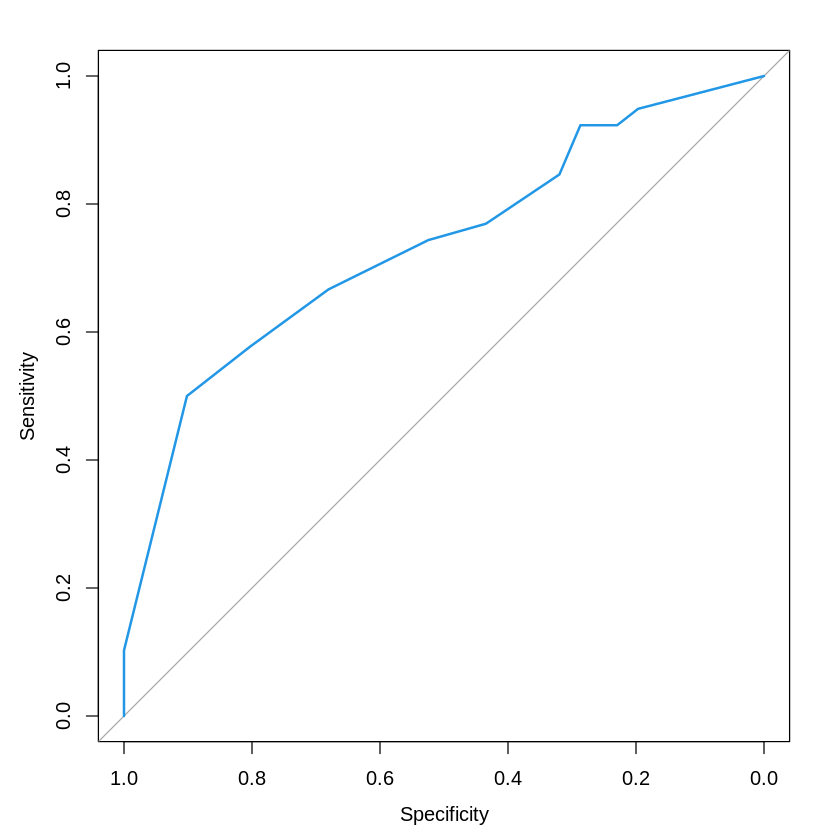

In [45]:
#Calculate ROC curve
rocCurve.tree <- roc(Carseats.test$HighSales,tree.probs[,"Yes"])
#plot the ROC curve
plot(rocCurve.tree,col=c(4))

In [46]:
#calculate the area under curve (bigger is better)
auc(rocCurve.tree)

Area under the curve: 0.7341

# 4. Model 1: *Bagging* of ctrees

Training the model using treebag

We first optimize fit of a classification tree. Our objective with the cross-validation is to optmize the size of the tree - tuning the complexity parameter.

In [47]:
#Fix data file for use in bag() function
# Carseats2 <- Carseats.train
# Carseats2$Urban <- as.factor(Carseats2$Urban)
# Carseats2$US <- as.factor(Carseats2$US)
# Carseats2$HighSales <- as.factor(Carseats2$HighSales)
# 
# train.bagg <- bag(Carseats2[,-11],Carseats2[,11], B = 10
#                    ,
#                    bagControl = bagControl(fit = ctreeBag$fit,
#                                         predict = ctreeBag$pred,
#                                         aggregate = ctreeBag$aggregate))


#Using treebag 
train.bagg <- train(as.factor(HighSales) ~ ., 
                   data=Carseats.train,
                   method="treebag",
                   trControl=cvcontrol,
                   importance=TRUE)

train.bagg

Bagged CART 

200 samples
 10 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 180, 180, 181, 180, 180, 180, ... 
Resampling results:

  Accuracy   Kappa    
  0.8038972  0.5978241


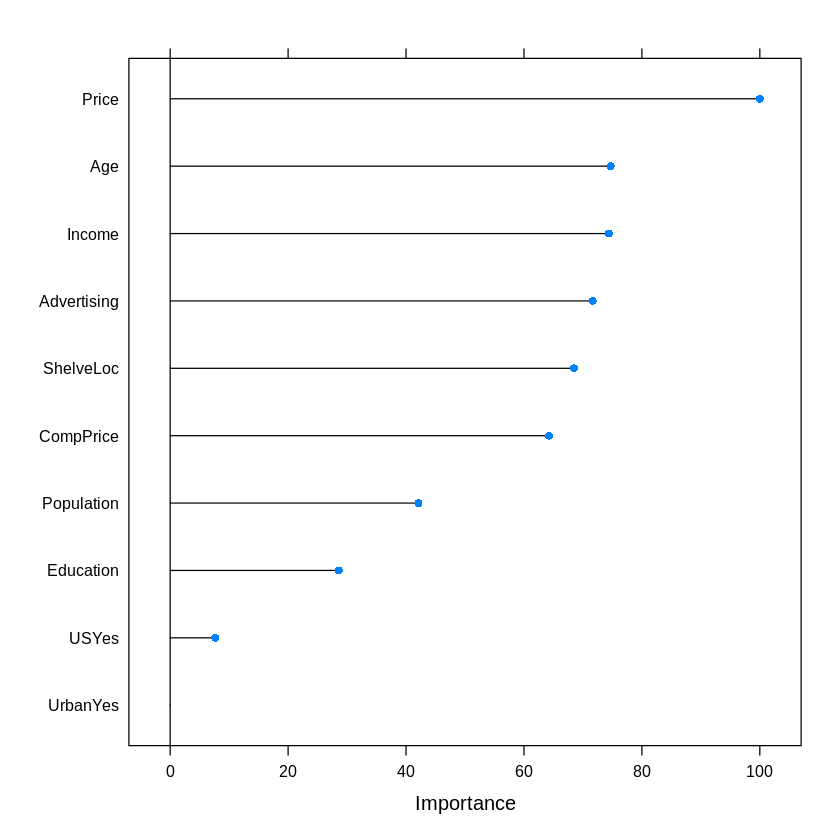

In [48]:
plot(varImp(train.bagg))

Not yet sure how to parse mode details from the output in order to look at the collection of trees.

Look at the collection of final trees

To evalaute the accuracy of the Bagged Trees we can look at the confusion matrix for the Training data.

In [49]:
#obtaining class predictions
bagg.classTrain <-  predict(train.bagg, 
                          type="raw")
head(bagg.classTrain)

[1] Yes No  Yes Yes Yes Yes
Levels: No Yes

In [50]:
#computing confusion matrix
confusionMatrix(Carseats.train$HighSales,bagg.classTrain)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  114   0
       Yes   0  86
                                     
               Accuracy : 1          
                 95% CI : (0.9817, 1)
    No Information Rate : 0.57       
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.00       
            Specificity : 1.00       
         Pos Pred Value : 1.00       
         Neg Pred Value : 1.00       
             Prevalence : 0.57       
         Detection Rate : 0.57       
   Detection Prevalence : 0.57       
      Balanced Accuracy : 1.00       
                                     
       'Positive' Class : No         
                                     

A precisão é perfeita!

Mais interessante é a matriz de confusão quando aplicada aos dados de teste.

In [51]:
#obtaining class predictions
bagg.classTest <-  predict(train.bagg, 
                         newdata = Carseats.test,
                          type="raw")
head(bagg.classTest)

[1] No  Yes Yes Yes No  Yes
Levels: No Yes

In [52]:
#computing confusion matrix
confusionMatrix(Carseats.test$HighSales,bagg.classTest)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  100  22
       Yes  16  62
                                          
               Accuracy : 0.81            
                 95% CI : (0.7487, 0.8619)
    No Information Rate : 0.58            
    P-Value [Acc > NIR] : 4.103e-12       
                                          
                  Kappa : 0.6061          
                                          
 Mcnemar's Test P-Value : 0.4173          
                                          
            Sensitivity : 0.8621          
            Specificity : 0.7381          
         Pos Pred Value : 0.8197          
         Neg Pred Value : 0.7949          
             Prevalence : 0.5800          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.6100          
      Balanced Accuracy : 0.8001          
                                          
       'Positive' Class : No              
                              

Precisão de 0,81

Também podemos olhar para a curva ROC extraindo probabilites de “Sim”.

In [53]:
#Obtaining predicted probabilites for Test data
bagg.probs=predict(train.bagg,
                 newdata=Carseats.test,
                 type="prob")
head(bagg.probs)

,No,Yes
,<dbl>,<dbl>
1,0.84,0.16
2,0.08,0.92
3,0.08,0.92
4,0.48,0.52
5,0.88,0.12
6,0.12,0.88


Setting levels: control = No, case = Yes

Setting direction: controls < cases



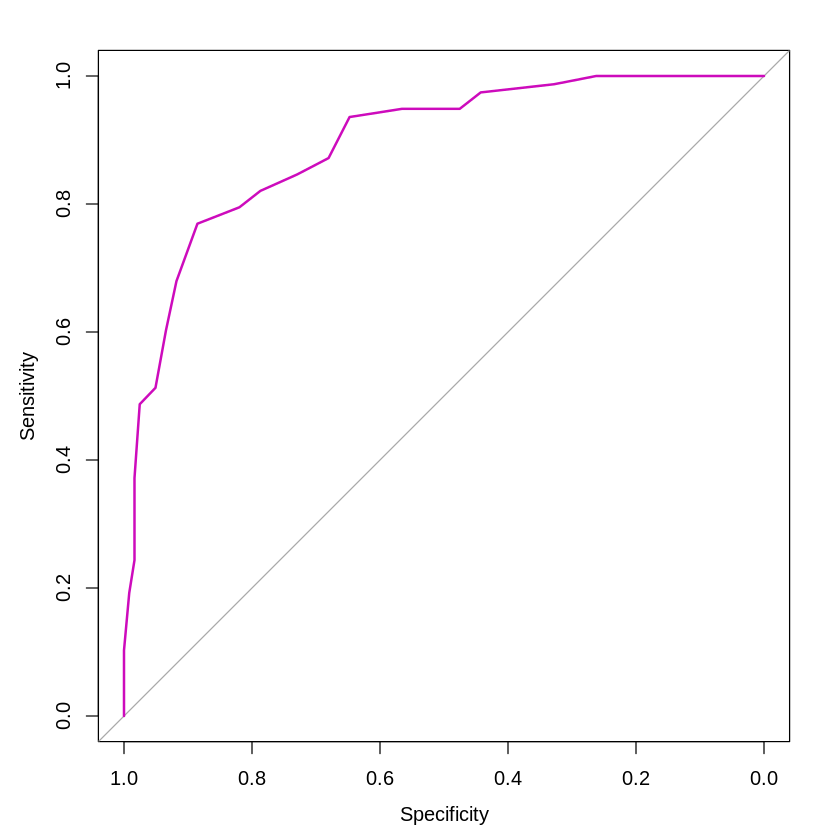

In [54]:
#Calculate ROC curve
rocCurve.bagg <- roc(Carseats.test$HighSales,bagg.probs[,"Yes"])
#plot the ROC curve
plot(rocCurve.bagg,col=c(6))

In [55]:
#calculate the area under curve (bigger is better)
auc(rocCurve.bagg)

Area under the curve: 0.894

# 5. Modelo 2: *Random Forest* para árvores de classificação

Treinar o modelo usando floresta aleatória


In [58]:
train.rf <- train(as.factor(HighSales) ~ ., 
                  data=Carseats.train,
                  method="rf",
                  trControl=cvcontrol,
                  #tuneLength = 3,
                  importance=TRUE)
train.rf

Random Forest 

200 samples
 10 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 181, 180, 180, 179, 179, 180, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.7909649  0.5648520
   6    0.8194612  0.6253877
  10    0.8447494  0.6791567

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.

Podemos olhar a matriz de confusão para os dados de treinamento.

In [59]:
#obtaining class predictions
rf.classTrain <-  predict(train.rf, 
                          type="raw")
head(rf.classTrain)

[1] Yes No  Yes Yes Yes Yes
Levels: No Yes

In [60]:
#computing confusion matrix
confusionMatrix(Carseats.train$HighSales,rf.classTrain)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  114   0
       Yes   0  86
                                     
               Accuracy : 1          
                 95% CI : (0.9817, 1)
    No Information Rate : 0.57       
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.00       
            Specificity : 1.00       
         Pos Pred Value : 1.00       
         Neg Pred Value : 1.00       
             Prevalence : 0.57       
         Detection Rate : 0.57       
   Detection Prevalence : 0.57       
      Balanced Accuracy : 1.00       
                                     
       'Positive' Class : No         
                                     

Sem erros. Isso é bom - o modelo foi bem aprendido.

Mais interessante é a matriz de confusão quando aplicada aos dados de teste.

In [61]:
#obtaining class predictions
rf.classTest <-  predict(train.rf, 
                         newdata = Carseats.test,
                          type="raw")
head(rf.classTest)

[1] No  Yes Yes No  No  Yes
Levels: No Yes

In [62]:
#computing confusion matrix
confusionMatrix(Carseats.test$HighSales,rf.classTest)

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  109  13
       Yes  20  58
                                          
               Accuracy : 0.835           
                 95% CI : (0.7762, 0.8836)
    No Information Rate : 0.645           
    P-Value [Acc > NIR] : 2.1e-09         
                                          
                  Kappa : 0.6475          
                                          
 Mcnemar's Test P-Value : 0.2963          
                                          
            Sensitivity : 0.8450          
            Specificity : 0.8169          
         Pos Pred Value : 0.8934          
         Neg Pred Value : 0.7436          
             Prevalence : 0.6450          
         Detection Rate : 0.5450          
   Detection Prevalence : 0.6100          
      Balanced Accuracy : 0.8309          
                                          
       'Positive' Class : No              
                              

Precisão de 0,83. Uma melhoria em relação ao Bagging apenas

Também podemos olhar para a curva ROC extraindo probabilites de “Sim”.

In [63]:
#Obtaining predicted probabilites for Test data
rf.probs=predict(train.rf,
                 newdata=Carseats.test,
                 type="prob")
head(rf.probs)

,No,Yes
,<dbl>,<dbl>
1,0.906,0.094
2,0.124,0.876
3,0.080,0.920
6,0.574,0.426
7,0.864,0.136
8,0.166,0.834


Setting levels: control = No, case = Yes

Setting direction: controls < cases



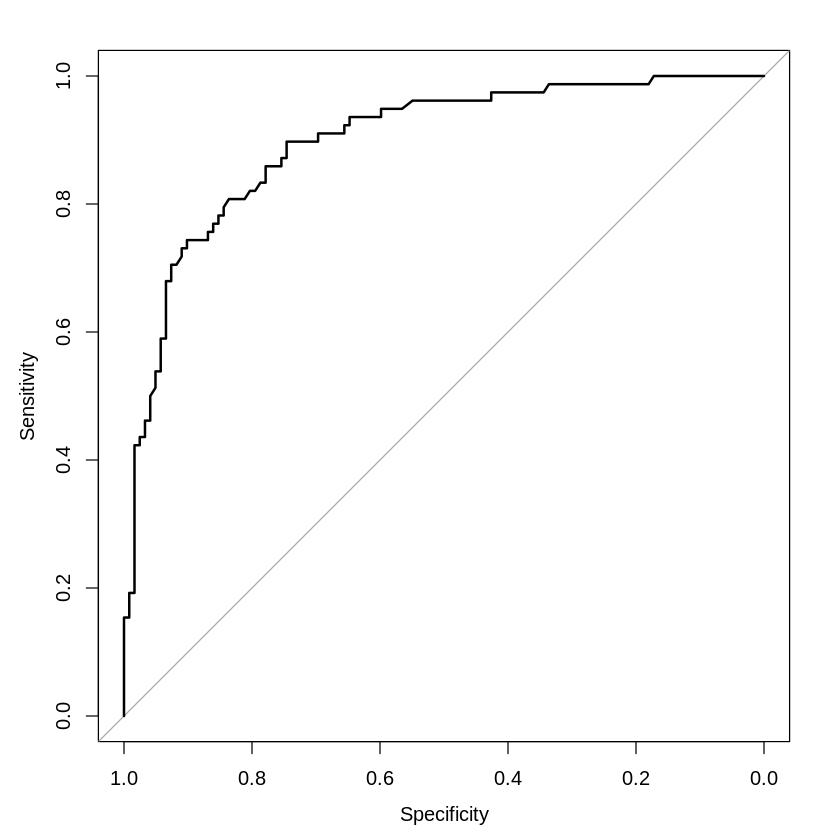

In [64]:
#Calculate ROC curve
rocCurve.rf <- roc(Carseats.test$HighSales,rf.probs[,"Yes"])
#plot the ROC curve
plot(rocCurve.rf,col=c(1))

In [65]:
#calculate the area under curve (bigger is better)
auc(rocCurve.rf)

Area under the curve: 0.8972